In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import datetime



In [42]:
data = pd.read_csv(r"C:\Users\aryan\OneDrive\Desktop\GFG task\data.csv")

In [43]:
data

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [44]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda x: x.month)
data['day'] = data['date'].apply(lambda x: x.day)
data['hour'] = data['date'].apply(lambda x: x.hour)
data['minute'] = data['date'].apply(lambda x: x.minute)
data = data.drop('date', axis=1)

In [45]:
data.isnull().sum()
data

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,minute
0,37,61211,4,0,0,71.76,0,0,8,17,14,0
1,45,62414,4,0,0,71.76,0,0,8,17,14,20
2,40,63015,4,0,0,71.76,0,0,8,17,14,30
3,44,63616,4,0,0,71.76,0,0,8,17,14,40
4,45,64217,4,0,0,71.76,0,0,8,17,14,50
...,...,...,...,...,...,...,...,...,...,...,...,...
62179,23,67348,5,1,0,61.07,0,1,3,18,18,42
62180,21,67955,5,1,0,61.07,0,1,3,18,18,52
62181,25,68560,5,1,0,56.71,0,1,3,19,18,2
62182,18,69167,5,1,0,56.71,0,1,3,19,18,12


In [46]:
data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,minute
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460,15.891885,28.742538
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631,8.811365,17.323887
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000,8.000000,16.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000,16.000000,30.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000,24.000000,42.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000,31.000000,59.000000


In [47]:
data

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,minute
0,37,61211,4,0,0,71.76,0,0,8,17,14,0
1,45,62414,4,0,0,71.76,0,0,8,17,14,20
2,40,63015,4,0,0,71.76,0,0,8,17,14,30
3,44,63616,4,0,0,71.76,0,0,8,17,14,40
4,45,64217,4,0,0,71.76,0,0,8,17,14,50
...,...,...,...,...,...,...,...,...,...,...,...,...
62179,23,67348,5,1,0,61.07,0,1,3,18,18,42
62180,21,67955,5,1,0,61.07,0,1,3,18,18,52
62181,25,68560,5,1,0,56.71,0,1,3,19,18,2
62182,18,69167,5,1,0,56.71,0,1,3,19,18,12


Text(0.5, 1.0, 'Correlation between different fearures')

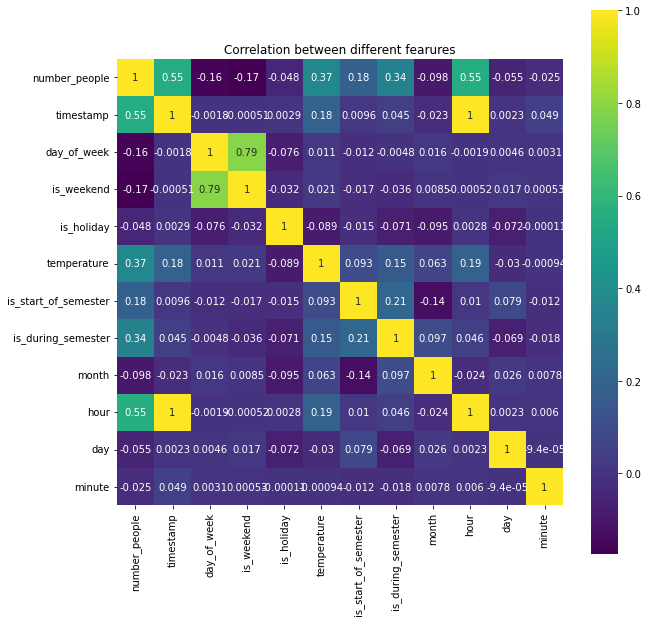

In [48]:
correlation = data.corr()


plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [49]:
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm


In [50]:
y = data['number_people'].values
data = data.drop(['number_people','is_weekend'],axis=1)
X = data.values
data.head()

,timestamp,day_of_week,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,minute
0,61211,4,0,71.76,0,0,8,17,14,0
1,62414,4,0,71.76,0,0,8,17,14,20
2,63015,4,0,71.76,0,0,8,17,14,30
3,63616,4,0,71.76,0,0,8,17,14,40
4,64217,4,0,71.76,0,0,8,17,14,50


In [51]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)

In [52]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [53]:
sdg = SGDRegressor()
sdg.fit(Xtrain, ytrain)
y_val_l = sdg.predict(Xtest)
print(sdg.score(Xtest, ytest))

0.5143742463699246


In [55]:
radm = RandomForestRegressor()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict(Xtest)
print(radm.score(Xtest, ytest)*100)

91.77757842319596


# Goal 1- Using the pickled model prediction can be made.

In [57]:

import pickle
pickle.dump(radm, open("random_gym_mode.pkl", 'wb'))

In [59]:
loaded_model = pickle.load(open("random_gym_mode.pkl", 'rb'))
result = loaded_model.score(Xtest, ytest)
print(result)

0.9177757842319596


In [60]:
result*100

91.77757842319596

# Goal 2- Features which are most important.

In [61]:
import numpy as np
indices = np.argsort(radm.feature_importances_)[::-1]


print('Feature ranking:')

for f in range(data.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], data.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 0 timestamp (0.511230)
2. feature 5 is_during_semester (0.107991)
3. feature 3 temperature (0.086020)
4. feature 1 day_of_week (0.078882)
5. feature 6 month (0.070268)
6. feature 8 day (0.068457)
7. feature 9 minute (0.058990)
8. feature 4 is_start_of_semester (0.010726)
9. feature 7 hour (0.007410)
10. feature 2 is_holiday (0.000026)
